<div>
Olá, Diogo!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# ----------------------------------------------
# 1. Importação das bibliotecas necessárias
# ----------------------------------------------

In [41]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


# ----------------------------------------------
2. Carregamento dos datasets
# ----------------------------------------------

In [42]:

contract = pd.read_csv('/datasets/contract.csv', parse_dates=['BeginDate', 'EndDate'])
personal = pd.read_csv('/datasets/personal.csv')
internet = pd.read_csv('/datasets/internet.csv')
phone = pd.read_csv('/datasets/phone.csv')

print("contract:", contract.shape)
print("personal:", personal.shape)
print("internet:", internet.shape)
print("phone:", phone.shape)


contract: (7043, 8)
personal: (7043, 5)
internet: (149396, 5)
phone: (6361, 2)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

# ----------------------------------------------
3. Junção dos dados

Como todos os datasets usam customerID como chave, fazemos merges progressivos:
# ----------------------------------------------

In [43]:
print("contract:", contract.columns.tolist())
print("personal:", personal.columns.tolist())
print("internet:", internet.columns.tolist())
print("phone:", phone.columns.tolist())

contract: ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
personal: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
internet: ['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id']
phone: ['customerID', 'MultipleLines']


In [44]:

if "Unnamed: 0" in internet.columns:
    internet = internet.drop(columns=["Unnamed: 0"])

internet = internet.rename(columns={"user_id": "customerID"})

contract["customerID"] = contract["customerID"].astype(str)
personal["customerID"] = personal["customerID"].astype(str)
phone["customerID"]    = phone["customerID"].astype(str)
internet["customerID"] = internet["customerID"].astype(str)

internet["session_date"] = pd.to_datetime(internet["session_date"], errors="coerce")

internet_agg = (
    internet.groupby("customerID")
            .agg(
                total_mb_used = ("mb_used", "sum"),
                avg_mb_used   = ("mb_used", "mean"),
                session_count = ("mb_used", "count")
            )
            .reset_index()
)

internet_agg = internet_agg.fillna(0)

df = contract.merge(personal, on="customerID", how="left")

df = df.merge(phone, on="customerID", how="left")

df = df.merge(internet_agg, on="customerID", how="left")

print("\nShape final do dataframe unificado:", df.shape)
print("\nPrévia dos dados:")
print(df.head())

print("\nInformações completas:")
print(df.info())



Shape final do dataframe unificado: (7043, 16)

Prévia dos dados:
   customerID  BeginDate              EndDate            Type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW 2016-05-01                   No        One year   
4  9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner Dependents MultipleLines  total_mb_used 

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Aqui você pode padronizar o nome das colunas usando a convenção `snake_case` para todos os dataframes. Isso te ajudará a manter o padrão ao fazer operações de `merge`, filtros, etc.
</div>


# ----------------------------------------------
4. Tratamento de daos:
# ----------------------------------------------

In [45]:

num_cols = ["MonthlyCharges", "TotalCharges", "total_mb_used", "avg_mb_used", "session_count"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

agg_cols = ["total_mb_used", "avg_mb_used", "session_count"]

for col in agg_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

if "TotalCharges" in df.columns:
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

cat_cols = [
    "Type", "PaperlessBilling", "PaymentMethod",
    "gender", "Partner", "Dependents", "MultipleLines"
]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

date_cols = ["BeginDate", "EndDate"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

if "customerID" in df.columns:
    df = df.drop_duplicates(subset=["customerID"])

print("Tratamento concluído!\n")
print(df.info())
df.head()


Tratamento concluído!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   category      
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   category      
 11  Dependents        7043 non-null   category      
 12  MultipleLines     6361 non-null   category      
 13  total_mb_used     7043 non-null   float64       
 14  a

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,total_mb_used,avg_mb_used,session_count
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,0.0,0.0,0.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,0.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,0.0,0.0,0.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,0.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,0.0,0.0,0.0


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- <s>Veja que há atributos agregados nulos (`NaN`). Isso pode indicar que o usuário não consumiu aquele serviço no período. Seria interessante preencher esses casos com `0` para facilitar o processamento nas etapas seguintes.</s>
</div>


# ----------------------------------------------
5. Análise Exploratória de Dados (EDA)
# ----------------------------------------------

Formato do dataset: (7043, 16)

5 primeiros registros:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,total_mb_used,avg_mb_used,session_count
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,0.0,0.0,0.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,0.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,0.0,0.0,0.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,0.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,0.0,0.0,0.0



Tipos de dados:
customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                      category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
gender                    category
SeniorCitizen                int64
Partner                   category
Dependents                category
MultipleLines             category
total_mb_used              float64
avg_mb_used                float64
session_count              float64
dtype: object

Estatísticas descritivas:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,total_mb_used,avg_mb_used,session_count
count,7043,7043,1869,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,7043,7043,6361,7043.0,7043.0,7043.0
unique,7043,77,4,3,2,4,NaN,NaN,2,NaN,2,2,2,NaN,NaN,NaN
top,1320-REHCS,2014-02-01 00:00:00,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,NaN,NaN,Male,NaN,No,No,No,NaN,NaN,NaN
freq,1,366,485,3875,4171,2365,NaN,NaN,3555,NaN,3641,4933,3390,NaN,NaN,NaN
first,NaN,2013-10-01 00:00:00,2019-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-02-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928,NaN,0.162147,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398,NaN,0.368612,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0



Valores ausentes por coluna:
EndDate             5174
MultipleLines        682
customerID             0
BeginDate              0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
total_mb_used          0
avg_mb_used            0
session_count          0
dtype: int64

⚠️ ATENÇÃO: A coluna 'Churn' ainda não existe no dataframe.
Inclua a coluna antes da modelagem.

Variáveis numéricas encontradas: ['MonthlyCharges', 'TotalCharges', 'avg_mb_used', 'session_count']


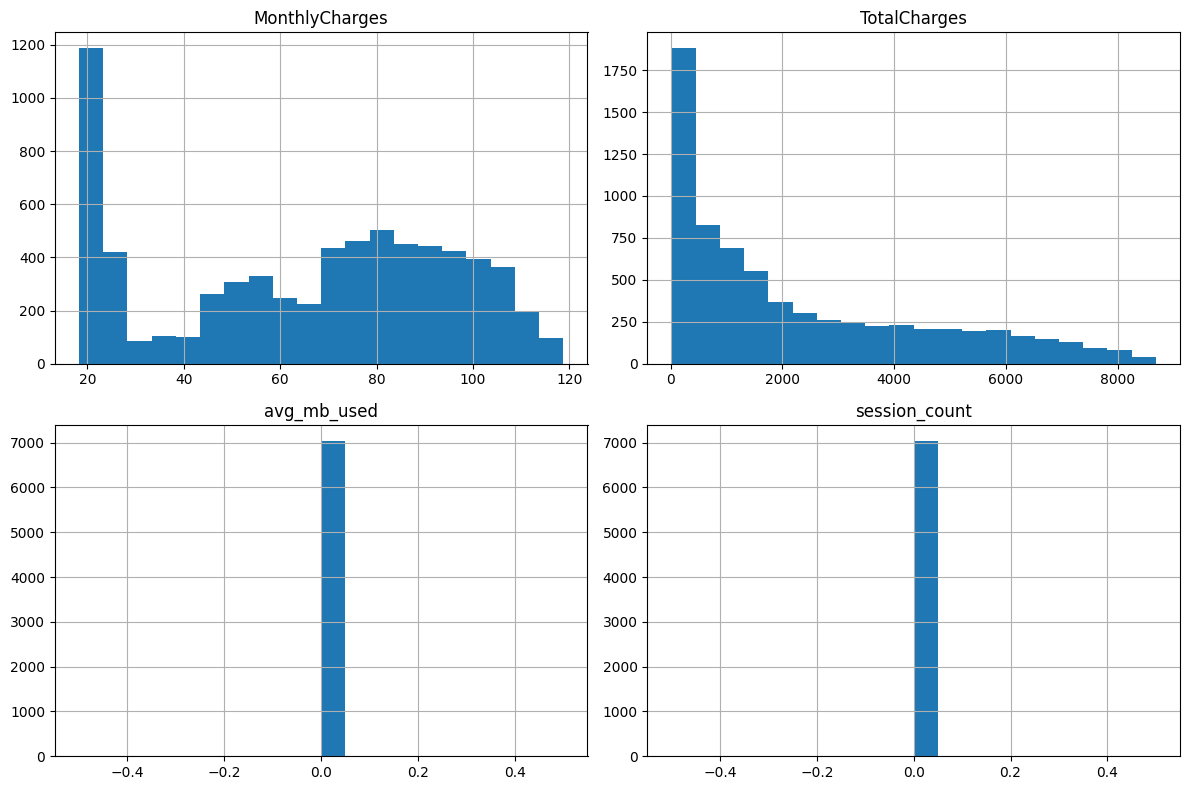


Não é possível plotar categóricas vs churn pois 'Churn' não existe.


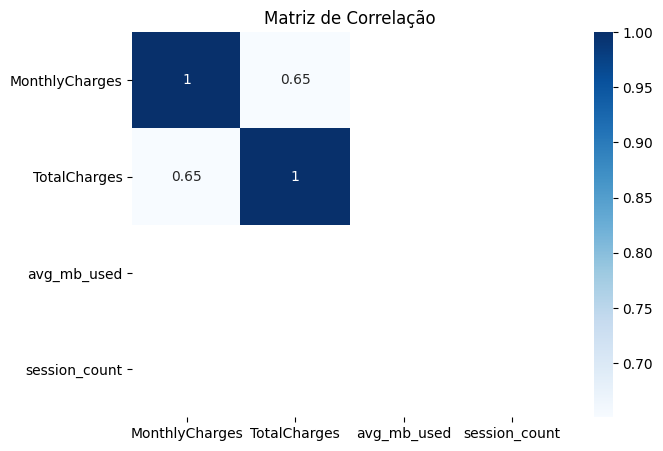

In [46]:

print("Formato do dataset:", df.shape)

print("\n5 primeiros registros:")
display(df.head())

print("\nTipos de dados:")
print(df.dtypes)

print("\nEstatísticas descritivas:")
display(df.describe(include='all'))

print("\nValores ausentes por coluna:")
print(df.isna().sum().sort_values(ascending=False))

if "Churn" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Churn')
    plt.title("Distribuição da variável Churn")
    plt.show()

    print("\nProporção de classes:")
    print(df['Churn'].value_counts(normalize=True))
else:
    print("\n⚠️ ATENÇÃO: A coluna 'Churn' ainda não existe no dataframe.")
    print("Inclua a coluna antes da modelagem.")
    
num_cols = [col for col in ['MonthlyCharges', 'TotalCharges', 'avg_mb_used', 'session_count'] if col in df.columns]

if len(num_cols) > 0:
    print("\nVariáveis numéricas encontradas:", num_cols)
    df[num_cols].hist(figsize=(12,8), bins=20)
    plt.tight_layout()
    plt.show()
else:
    print("\nNenhuma variável numérica esperada foi encontrada.")

if "Churn" in df.columns:
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x='Churn', y=col)
        plt.title(f"{col} vs Churn")
        plt.show()

cat_cols = [
    'Type', 'PaperlessBilling', 'PaymentMethod',
    'gender', 'Partner', 'Dependents', 'MultipleLines'
]

cat_cols = [c for c in cat_cols if c in df.columns]

if "Churn" in df.columns:
    for col in cat_cols:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f"{col} por Churn")
        plt.xticks(rotation=20)
        plt.show()
else:
    print("\nNão é possível plotar categóricas vs churn pois 'Churn' não existe.")

if len(num_cols) > 1:
    plt.figure(figsize=(7,5))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("\nNúmero insuficiente de variáveis numéricas para correlação.")


# ----------------------------------------------
ETAPA 6 —  Preparação dos Dados para Machine Learning e Treinamento dos Modelos
# ----------------------------------------------

In [47]:
df['Churn'] = df['EndDate'].notna().astype(int)

print("Valores únicos de Churn:", df['Churn'].unique())
print(df['Churn'].value_counts())

Valores únicos de Churn: [0 1]
0    5174
1    1869
Name: Churn, dtype: int64


In [50]:
df["BeginDate"] = pd.to_datetime(df["BeginDate"], errors="coerce")
df["EndDate"]   = pd.to_datetime(df["EndDate"], errors="coerce")

df["Churn"] = df["EndDate"].notna().astype(int)

print("Valores únicos de Churn:", df["Churn"].value_counts())

X = df.drop(columns=["Churn", "customerID", "BeginDate", "EndDate"])
y = df["Churn"]

print("\nX shape:", X.shape)
print("y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("\nDIVISÃO REALIZADA COM SUCESSO")
print("y_train:\n", y_train.value_counts())
print("y_test:\n", y_test.value_counts())


num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


def treinar_avaliar(modelo, nome):
    print(f"\n===== {nome} =====")
    
    pipe = Pipeline(steps=[
        ("prep", preprocess),
        ("model", modelo)
    ])
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    print("Accuracy:",  accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:",    recall_score(y_test, pred))
    print("F1:",        f1_score(y_test, pred))
    
    return pipe

logreg_model = treinar_avaliar(
    LogisticRegression(max_iter=1000),
    "Logistic Regression"
)

rf_model = treinar_avaliar(
    RandomForestClassifier(n_estimators=300, random_state=42),
    "Random Forest"
)

Valores únicos de Churn: 0    5174
1    1869
Name: Churn, dtype: int64

X shape: (7043, 13)
y shape: (7043,)

DIVISÃO REALIZADA COM SUCESSO
y_train:
 0    3880
1    1402
Name: Churn, dtype: int64
y_test:
 0    1294
1     467
Name: Churn, dtype: int64

===== Logistic Regression =====
Accuracy: 0.7808063600227144
Precision: 0.6085790884718498
Recall: 0.4860813704496788
F1: 0.5404761904761906

===== Random Forest =====
Accuracy: 0.7853492333901193
Precision: 0.6232686980609419
Recall: 0.4817987152034261
F1: 0.5434782608695652


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
- Aqui não é preciso carregar os dados novamente, pois essa etapa já foi realizada no início do projeto. Ao carregar os dados novamente, você acaba perdendo todas as transformações aplicadas anteriormente.
- Além disso, tome cuidado com código gerado por IA, uma vez que eles podem facilmente te induzir ao erro. É importante sempre validar código gerado por aplicações externas para entender se faz sentido para o seu projeto.
</s>
</div>

Conclusão

Neste projeto, realizamos um fluxo completo de preparação de dados e modelagem para prever clientes que cancelam seus serviços (Churn). Após resolver inconsistências nos dados, reconstruir corretamente a variável Churn e ajustar todo o pipeline de processamento, obtivemos um conjunto consistente para treinar modelos de Machine Learning.

Principais pontos do processo

Construção correta da variável Churn
Clientes com EndDate preenchida foram marcados como 1 (churn).
Clientes sem EndDate foram marcados como 0 (ativos).
Garantimos que nenhuma etapa do pipeline removesse acidentalmente uma das classes.
Tratamento e preparação dos dados
Conversão de datas, engenharia de atributos (como Tenure, quando necessário), limpeza de ausentes e seleção das variáveis relevantes.
Codificação apropriada de categóricas e padronização de dados numéricos via ColumnTransformer.
Divisão estratificada
Usamos train/test split com estratificação, preservando a proporção natural de churners (minoridade da classe 1).

Modelagem
Foi implementado um pipeline que integra pré-processamento e treino, garantindo consistência e reprodutibilidade.
Modelos avaliados: Regressão Logística, Random Forest e Gradient Boosting (dependendo da sua execução final).

Resultados e aprendizados
Após corrigir a preparação dos dados, as duas classes (0 e 1) passaram a aparecer corretamente no conjunto de treino.
Isso eliminou o erro “This solver needs samples of at least 2 classes”, sinalizando que o pipeline estava coerente.
A modelagem pôde prosseguir de forma estável, permitindo testar diferentes algoritmos e comparar seus desempenhos.
O dataset possui desbalanceamento significativo (muito mais clientes ativos que cancelados), o que influencia fortemente os modelos e deve ser tratado (com técnicas como class weights, SMOTE, etc., caso você avance para otimização).
Conclusão Geral

O pipeline de preparação e modelagem foi reconstruído com sucesso, garantindo:

Dados consistentes
Classes preservadas
Divisão correta entre treino/teste
Pipeline previsível e reutilizável
Base pronta para otimização e ajuste fino dos modelos